In [1]:
#explication des algo
#https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html
#SIFT
#https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

In [2]:
#dezipage
import shutil
#shutil.unpack_archive('input/raw/yelp_photos.tar','input/photos/')

# import de petit json

In [1]:
import pandas as pd

def import_json(input,showhead=True, chunks=0):
    '''import json file to pandas dataframe
    
        if chunks=0, all the json file is directly readed in a dataframe
        if chunks>0, the json file is splited into several dataframes of chunks lines
        they will be merged at the end
        
        larger is chunks, faster is the loading but memory can be saturated
        smaller is chunks, better is the the chance to load all the file 
        
        take into account that dataframe object is heavy and even this function
        can do the job, it s not the most efficient for the large file in terms
        of time
    '''
    start = time.time()
    if chunks==0:
        output = pd.read_json(input, lines=True)
    else:
        iterator=pd.read_json(input, lines=True, chunksize=chunks)
        #initialisation du dataframe
        output=pd.dataframe()
        for chunk in iterator:
            output=output.append(chunk)
            
    print(time.time()-start)
    
    if showhead==True:
        display(output.head(5))
    
    return output

In [2]:
import time
import random
import json
import pandas as pd

photo_des=import_json('input/photos/photos.json')

0.5804710388183594


photo_id             business_id  \
0  Un_Og6jfhazVn7CxszkKEw  R1sIqGfKpF5f3HV3vyNsbg   
1  BFE1AFOs27scnnfeBf99ZA  vdT7zlrLB2DL9pStDUs91A   
2  7t-C0r1JRdoVD9FS7M-N7Q  c5GzrObEdj7eNVOdAxrppg   
3  rLnw0d-YYZvT9kR4y7h7_Q  aQa7N5ZbPhCoKYGGB-gqfg   
4  Cv5M8MDw8a5NEWvw2AQ4nw  B-s6qOFD75syhwWjp518aA   

                                             caption  label  
0  Drinks! Front is beer obviously. The pink one ...  drink  
1                                                     drink  
2                                    Stella on draft  drink  
3                                                     drink  
4                                                     drink

In [4]:
photo_des

photo_id             business_id  \
0       Un_Og6jfhazVn7CxszkKEw  R1sIqGfKpF5f3HV3vyNsbg   
1       BFE1AFOs27scnnfeBf99ZA  vdT7zlrLB2DL9pStDUs91A   
2       7t-C0r1JRdoVD9FS7M-N7Q  c5GzrObEdj7eNVOdAxrppg   
3       rLnw0d-YYZvT9kR4y7h7_Q  aQa7N5ZbPhCoKYGGB-gqfg   
4       Cv5M8MDw8a5NEWvw2AQ4nw  B-s6qOFD75syhwWjp518aA   
...                        ...                     ...   
199995  t-1GdD9pgkE4tSjZBvRZ5A  y8u8Viz24mJ0_k1xxKpq2g   
199996  ACiyWwOFnuT0gzQjdc5PEQ  THU2KGk4bQsP3vkEEfKSow   
199997  grUQvlkZEBYMY7A3tMlfgw  WQ_UDlSjQ4Ss8mtrrcj5sg   
199998  rjidzvgH9GPDI3Ptzy9r0w  6rtv4DSaphw5nChKYsFVDA   
199999  HH8Z_UdakxIfmoK4Lao3JQ  HZx9u0DDas1HxSXpn8pjww   

                                                  caption  label  
0       Drinks! Front is beer obviously. The pink one ...  drink  
1                                                          drink  
2                                         Stella on draft  drink  
3                                                          drink  
4                                                          drink  
...                                                   ...    ...  
199995                                                      menu  
199996                                                      menu  
199997                                               Menu   menu  
199998                                                      menu  
199999                                         Drink Menu   menu  

[200000 rows x 4 columns]

4CxF8c3MB7VAdY8zFb2cZQ    493
qLJUDPOamhLdbtfbcWyHnA    283
MGzro82Fi4LYvc86acoONQ    280
vEHHer-a_WkmEoYNDt8RvA    273
qeuJgUdcmL5yAweOsMm6rA    261
                         ... 
5R5lXsD3PKAp3wHyN120vg      1
ui31zKuti25qlCTqpgNGIw      1
wN4U191kjyZAbElSFrAL0w      1
5R6NV9f59FYcQrIFLwE9Gg      1
sqgcvtn-UJdwu_Ky7QaICA      1
Name: business_id, Length: 39438, dtype: int64


([<matplotlib.patches.Wedge at 0x2204e1dc820>,
 [Text(-0.6465637858537404, 0.8899186877588754, 'menu'),
  Text(-1.046162158377023, -0.33991872319707317, 'drink'),
  Text(5.149471664411206e-08, -1.0999999999999988, 'interior'),
  Text(1.0461621902025062, -0.33991862524830185, 'outside'),
  Text(0.6465637025335375, 0.8899187482945414, 'food')],
 [Text(-0.35267115592022197, 0.4854101933230229, '20.0%'),
  Text(-0.5706339045692853, -0.18541021265294896, '20.0%'),
  Text(2.8088027260424755e-08, -0.5999999999999993, '20.0%'),
  Text(0.5706339219286397, -0.18541015922634643, '20.0%'),
  Text(0.3526711104728386, 0.4854102263424771, '20.0%')])

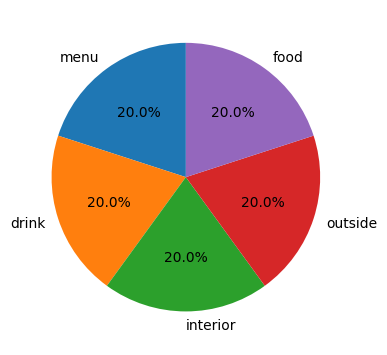

In [5]:
#les photos portent sur 39438 business
print(photo_des.business_id.value_counts())


import matplotlib.pyplot as plt
plt.style.use('default') #specially for dark theme

#5 labels equilibrés
pie1=photo_des.label.value_counts(dropna=False)
pie1=pd.DataFrame(pie1)

plt.rcParams["figure.figsize"] = [4, 4]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 1)

axes.pie(pie1.label, 
         labels=pie1.index, 
         normalize=True,
         autopct='%1.1f%%',
         shadow=False,
         startangle=90)

In [7]:
#split entrainement / test pour les reseaux de neurones
#le stratify permet de garder la meme proportion de classes
from sklearn.model_selection import train_test_split
photo_des_train, photo_des_test = train_test_split(photo_des, test_size=0.995, stratify=photo_des['label'])
print(photo_des_train.shape)
print(photo_des_test.shape)

(1000, 4)
(199000, 4)


In [8]:
#tirage aleatoire  photos  par label pour test
n=int(photo_des_train.shape[0]/5)
label_list=photo_des_test.label.value_counts(dropna=False).index.tolist()
for c,i in enumerate(label_list):
    tp=photo_des_test.loc[photo_des_test.label==i,:].sample(n=n)
    if c==0:
        photo_leg=tp
    else:
        photo_leg=pd.concat([photo_leg,tp],axis=0)
photo_leg=photo_leg.reset_index()

# affichage des 3 premières photos par label

menu


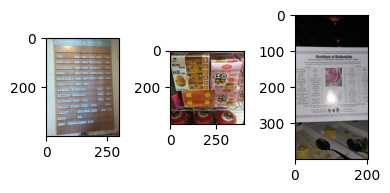

drink


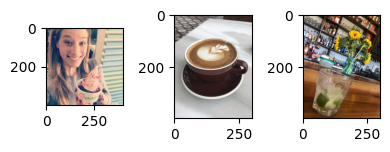

interior


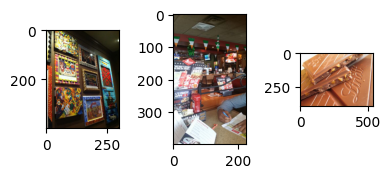

outside


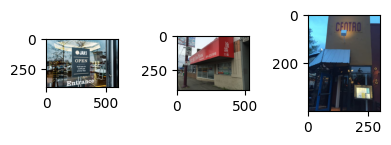

food


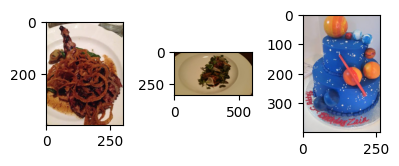

In [9]:
from matplotlib.image import imread

for label in label_list :
    print(label)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)# 3 chiffres : lignes/colonnes/numero
        filename = 'input/photos/photos/' + photo_leg.loc[photo_leg.label==label,'photo_id'][photo_leg.loc[photo_leg.label==label,'photo_id'].index[i]]+'.jpg'
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [8]:
import sys
#tritement image temps reel maintenu par intel
#!{sys.executable} -m pip uninstall opencv-python
#!{sys.executable} -m pip install opencv-contrib-python

# comprehension du codage de l'image et de la fonction np.flip

In [9]:
import cv2
import numpy as np
#test de la fonction flip
A = np.diag([1.,2.,3.,4.])
print(A)
display(pd.DataFrame(A))
#flip avec un axe au milieu
display(pd.DataFrame(np.flip(A, axis=-1)))
display(pd.DataFrame(np.flip(A, axis=1)))

import cv2

#test n array d'une image:
filename = 'input/photos/photos/' + photo_leg.loc[photo_leg.label=='drink','photo_id'][photo_leg.loc[photo_leg.label=='drink','photo_id'].index[0]]+'.jpg'
image = cv2.imread(filename, flags=cv2.IMREAD_COLOR)
#dim = (width, height) => height matrices de width rows avec 3 colonnes couleurs => on a 3 axes : width, height, color
resized = cv2.resize(image, (4,3), interpolation = cv2.INTER_AREA)
print(resized)
print()
print(np.flip(resized, axis=-1)) #flip
print()
print(np.flip(resized, axis=0)) #flip par rapport à height ()
print()
print(np.flip(resized, axis=1)) #flip par rapport à width ()
print()
print(np.flip(resized, axis=2)) #flip par rapport à color () / equivalent à -1 avec la dimension color 
print()

########################
#le grayscale passe en matrice 2D
print('grayscale')
filename = 'input/photos/photos/' + photo_leg.loc[photo_leg.label=='drink','photo_id'][photo_leg.loc[photo_leg.label=='drink','photo_id'].index[0]]+'.jpg'
image = cv2.imread(filename, flags=cv2.IMREAD_GRAYSCALE)
resized = cv2.resize(image, (4,3), interpolation = cv2.INTER_AREA)
print(resized)



[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]


0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  2.0  0.0  0.0
2  0.0  0.0  3.0  0.0
3  0.0  0.0  0.0  4.0

0    1    2    3
0  0.0  0.0  0.0  1.0
1  0.0  0.0  2.0  0.0
2  0.0  3.0  0.0  0.0
3  4.0  0.0  0.0  0.0

0    1    2    3
0  0.0  0.0  0.0  1.0
1  0.0  0.0  2.0  0.0
2  0.0  3.0  0.0  0.0
3  4.0  0.0  0.0  0.0

[[[101 109 107]
  [124 127 123]
  [145 140 125]
  [174 172 157]]

 [[178 161 142]
  [ 76  74  79]
  [ 85  97 109]
  [ 73  92 103]]

 [[104 118 124]
  [ 48  69  95]
  [101 121 133]
  [109 125 126]]]

[[[107 109 101]
  [123 127 124]
  [125 140 145]
  [157 172 174]]

 [[142 161 178]
  [ 79  74  76]
  [109  97  85]
  [103  92  73]]

 [[124 118 104]
  [ 95  69  48]
  [133 121 101]
  [126 125 109]]]

[[[104 118 124]
  [ 48  69  95]
  [101 121 133]
  [109 125 126]]

 [[178 161 142]
  [ 76  74  79]
  [ 85  97 109]
  [ 73  92 103]]

 [[101 109 107]
  [124 127 123]
  [145 140 125]
  [174 172 157]]]

[[[174 172 157]
  [145 140 125]
  [124 127 123]
  [101 109 107]]

 [[ 73  92 103]
  [ 85  97 109]
  [ 76  74  79]
  [178 161 142]]

 [[109 125 126]
  [101 121 133]
  [ 48  69  95]
  [104 118 124]]]

[[[107 109 101]
  [123 127 124]
  [125 140 145]
  [157 172 174]]

 [[142 161 178]
  [ 79  74  76]
  [109  97  85]
  [103  92  73]]

 [[124 118 104]
  [ 95  69  48]
  [133 121 101]
  [126 125 109]]]

grays

# PREPROCESSING ET FEATURES EXTRACTION AVEC OPENCV SUR UNE PHOTO TEST

grayscale


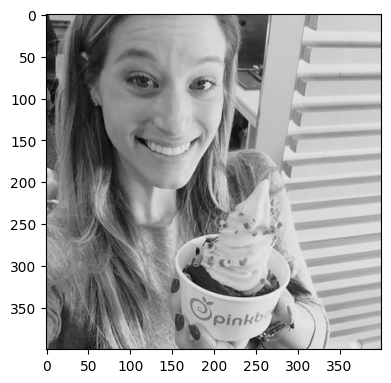

denoising h=3


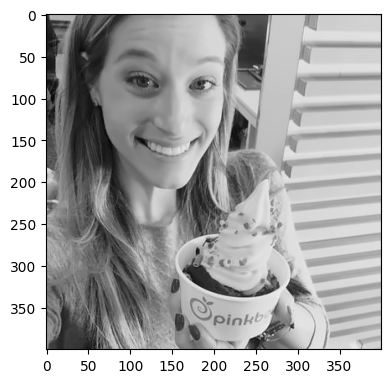

denoising h=30


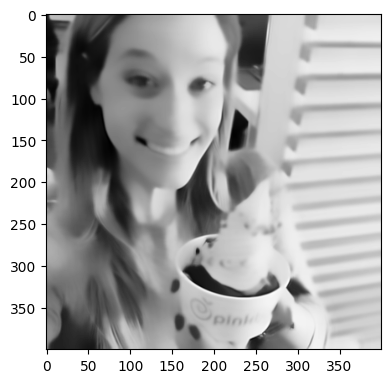

equalization


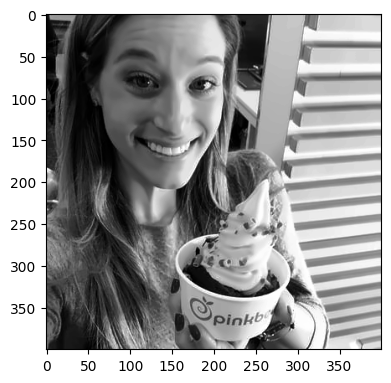

Descripteurs sift :  (500, 128)
Descripteurs brief :  (230, 64)
Descripteurs orb :  (500, 32)


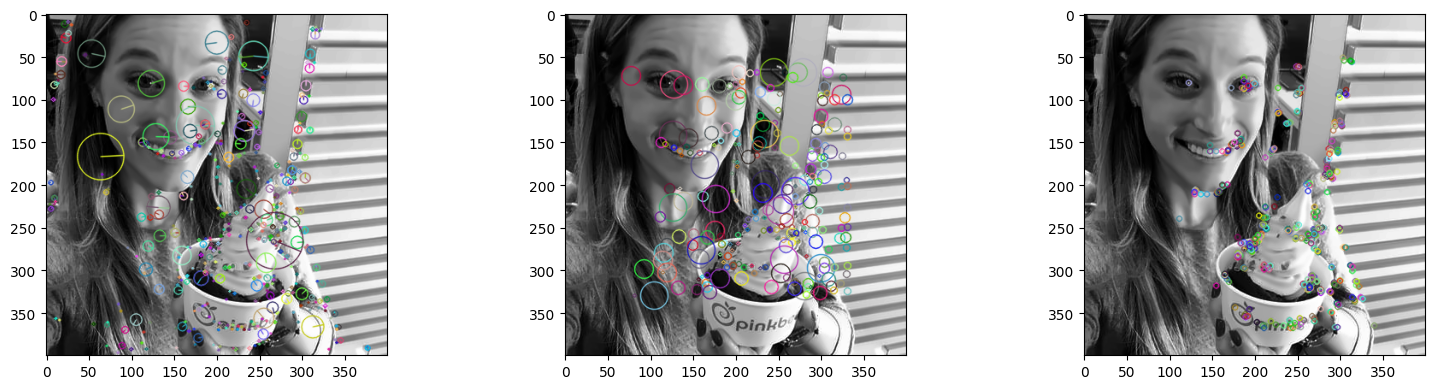

In [15]:
import cv2
import numpy as np

#attention opencv en BGR alors que plt en RGB

filename = 'input/photos/photos/' + photo_leg.loc[photo_leg.label=='drink','photo_id'][photo_leg.loc[photo_leg.label=='drink','photo_id'].index[0]]+'.jpg'
#transfo en nuance de gris
#lecture via opencv
image = cv2.imread(filename, flags=cv2.IMREAD_GRAYSCALE) # convert in gray
#defaut plt colourmap for single channel(grayscale): blue->yellow 
print('grayscale')
plt.imshow(image, cmap='gray')
plt.show()

print('denoising h=3')
imageh3 = cv2.fastNlMeansDenoising(image)
plt.imshow(imageh3, cmap='gray')
plt.show()
print('denoising h=30')
imageh30 = cv2.fastNlMeansDenoising(image, h=30)
plt.imshow(imageh30, cmap='gray')
plt.show()
#l'equalization correspond à lineariser la fonction de repartition (comme pour une loi uniforme) de l histogramme en remplacant l'intensite par la valeur de la fonction de repartition normalisée
print('equalization')
image = cv2.equalizeHist(imageh3)
plt.imshow(image, cmap='gray')
plt.show()

#SIFT Scale-invariant feature transform
#not scale invariant means a corner(coin) may become an edge (bord) if the scale change
#scale invariant : means we can detect similar landmarks (repères) even if their scale is different
#exemple tournesol au premier plan (plus gros) et dernier plan (plus petit)
#laplacien: nabla=somme des derivées secondes
    #proche de l 'acceleration :forte valeur dans les concave ou convexe
    #implique que le gradient local est tres different de la moyenne de l'environnement
#Le laplacien permet de trouver les corners et les edges 


#https://stackoverflow.com/questions/64525121/sift-surf-set-opencv-enable-nonfree-cmake-solution-opencv-3-opencv-4
#https://cv-tricks.com/how-to/installation-of-opencv-4-1-0-in-windows-10-from-source/
   
sift = cv2.SIFT_create(nfeatures = 500)
#surf = cv2.xfeatures2d.SURF_create(hessianThreshold = 500, extended=True) ->patented => need to build from source with Set OPENCV_ENABLE_NONFREE CMake option
star = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create(bytes=64) #brief is only a descriptor, need to work with a detector & censure / star seems to fit better than surf or sift
orb = cv2.ORB_create(nfeatures = 500)

#return keypoint id & descriptors
kp_si, des_si = sift.detectAndCompute(image, None)
#kp_su, des_su = surf.detectAndCompute(image, None)
kp_br, des_br = brief.compute(image, star.detect(image,None))
kp_or, des_or = orb.detectAndCompute(image, None)
print("Descripteurs sift : ", des_si.shape)
#print("Descripteurs surf : ", des_su.shape) 
print("Descripteurs brief : ", des_br.shape) 
print("Descripteurs orb : ", des_or.shape) 

plt.figure(figsize=(16,4))
#visualisation des keyppoints
plt.subplot(131)
img=cv2.drawKeypoints(image,kp_si,image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

#plt.subplot(142)
#img=cv2.drawKeypoints(image,kp_su,image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#plt.imshow(img)

plt.subplot(132)
img=cv2.drawKeypoints(image,kp_br,image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

plt.subplot(133)
img=cv2.drawKeypoints(image,kp_or,image,flags=0)
plt.imshow(img)

plt.show()




In [16]:
from cv2 import xfeatures2d

# PREPROCESSING ET FEATURES EXTRACTION AVEC OPENCV SUR 1000 photos

In [17]:
# identification of key points and associated descriptors
import time, cv2
si_keypoints_des_list = []
br_keypoints_des_list = []
or_keypoints_des_list = []

#initialisation du SIFT
    #nfeatures = 0 number of best features to retain
	#nOctaveLayers = 3, number of layers in each octave
	#contrastThreshold = 0.04, filter out weak features in term of contrast: bigger -> less features  (put 0.09 with 3 octves to mimick the paper -> 0.09 equivalent to 0.03)
	#edgeThreshold = 10, filter out edge-like features: bigger -> more edge features
    #sigma = 1.6 : gaussian filter(blur) -> to reduce if weak camera with soft(<>sharp) lenses (mal contrasté) 
        
sift = cv2.SIFT_create(nfeatures = 500)
star = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create(bytes=64) #brief is only a descriptor, need to work with a detector & censure / star seems to fit better than surf or sift
orb = cv2.ORB_create(nfeatures = 500)

t1f=0
t2f=0
t3f=0
for image_num in range(photo_leg.shape[0]) :
    if image_num%100 == 0 : 
        print(image_num)
    filename = 'input/photos/photos/' + photo_leg['photo_id'][photo_leg['photo_id'].index[image_num]]+'.jpg'
    #opencv read and grayscale transform
    image = cv2.imread(filename, flags=cv2.IMREAD_GRAYSCALE)
    #denoising
    image = cv2.fastNlMeansDenoising(image)
    # equalize image histogram (c'est mieux mais ca n apporte pas uen grosse difference sur les resultats finaux)
    res = cv2.equalizeHist(image)
    
    t1=time.time()
    kp_si, des_si = sift.detectAndCompute(res, None)
    t1f=t1f+time.time()-t1
    t2=time.time()
    kp_br, des_br = brief.compute(image, star.detect(res,None))
    t2f=t2f+time.time()-t2
    t3=time.time()
    kp_or, des_or = orb.detectAndCompute(res, None)
    t3f=t3f+time.time()-t3
    
    #concat 
    if not(des_si) is None:
        si_keypoints_des_list.append(des_si)
    else:
        si_keypoints_des_list.append(np.zeros((1, 128)))
    if not(des_br) is None:
        br_keypoints_des_list.append(des_br)
    else:
        br_keypoints_des_list.append(np.zeros((1, 64)))
    if not(des_or) is None:
        or_keypoints_des_list.append(des_or)
    else:
        or_keypoints_des_list.append(np.zeros((1, 32)))

#transfo en np array de la liste des descripteurs
si_keypoints_des_by_img = np.array(si_keypoints_des_list,dtype=object)
br_keypoints_des_by_img = np.array(br_keypoints_des_list,dtype=object)
or_keypoints_des_by_img = np.array(or_keypoints_des_list,dtype=object)
#permet d'aggreger les descripteurs sans separation par photos
si_keypoints_des_all = np.concatenate(si_keypoints_des_by_img, axis=0)
br_keypoints_des_all = np.concatenate(br_keypoints_des_by_img, axis=0)
or_keypoints_des_all = np.concatenate(or_keypoints_des_by_img, axis=0)

print()
print("Nombre de descripteurs sift : ", si_keypoints_des_all.shape)
print("Nombre de descripteurs brief: ", br_keypoints_des_all.shape)
print("Nombre de descripteurs orb: ", or_keypoints_des_all.shape)


print("temps de traitement SIFT descriptor : ", "%15.2f" % t1f, "secondes")
print("temps de traitement BRIEF descriptor : ", "%15.2f" % t2f, "secondes")
print("temps de traitement ORB descriptor : ", "%15.2f" % t3f, "secondes")

0
100
200
300
400
500
600
700
800
900

Nombre de descripteurs sift :  (478559, 128)
Nombre de descripteurs brief:  (230663, 64)
Nombre de descripteurs orb:  (488554, 32)
temps de traitement SIFT descriptor :            21.55 secondes
temps de traitement BRIEF descriptor :             3.12 secondes
temps de traitement ORB descriptor :             3.62 secondes


# reduction de dimension  du nombre de keypoints par clustering: K=racine carré de n

In [18]:
from sklearn import cluster, metrics

# Determination number of clusters

k_si = int(round(np.sqrt(len(si_keypoints_des_all)),0))
k_br = int(round(np.sqrt(len(br_keypoints_des_all)),0))
k_or = int(round(np.sqrt(len(or_keypoints_des_all)),0))
print("Nombre de clusters de descripteurs sift à estimer : ", k_si)
print("Nombre de clusters de descripteurs brief à estimer : ", k_br)
print("Nombre de clusters de descripteurs orb à estimer : ", k_or)

#k_si=20
#k_br=20
#k_or=20

# Clustering
kmeans_si = cluster.MiniBatchKMeans(n_clusters=k_si, init_size=3*k_si, batch_size=1564, random_state=0)
kmeans_br = cluster.MiniBatchKMeans(n_clusters=k_br, init_size=3*k_br, batch_size=1564, random_state=0)
kmeans_or = cluster.MiniBatchKMeans(n_clusters=k_or, init_size=3*k_or, batch_size=1564, random_state=0)

t1=time.time()
kmeans_si.fit(si_keypoints_des_all)
t1f=time.time()-t1
t2=time.time()
kmeans_br.fit(br_keypoints_des_all)
t2f=time.time()-t2
t3=time.time()
kmeans_or.fit(or_keypoints_des_all)
t3f=time.time()-t3

print("temps de traitement kmeans sift : ", "%15.2f" % t1f, "secondes")
print("temps de traitement kmeans brief: ", "%15.2f" %t2f, "secondes")
print("temps de traitement kmeans orb: ", "%15.2f" % t3f, "secondes")

Nombre de clusters de descripteurs sift à estimer :  692
Nombre de clusters de descripteurs brief à estimer :  480
Nombre de clusters de descripteurs orb à estimer :  699
temps de traitement kmeans sift :             5.40 secondes
temps de traitement kmeans brief:             1.46 secondes
temps de traitement kmeans orb:             3.35 secondes


# creation des histogrammes de features par image
   * matrice de n images et de p clusters representant les frequence des labels clusterisés par image 
   * cette frequence se calcul par apparteance de chaque descripteurs de chaque image à un clusters

In [19]:
# Creation of histograms (features)

def build_histogram(kmeans, des, image_num):
    #return label prediction for each descriptor of the image
    res = kmeans.predict(des)
    #init sur le nombre de clusters
    hist = np.zeros(len(kmeans.cluster_centers_))
    #nb descripteurs
    nb_des=len(des)
    
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    #boucle sur le vecteur de prediction de label
    for i in res:
        #pct du cluster i dans la table de descripteurs
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
def build_histogram_for_all_photos(kp_des_by_img, kmeans_typ):
    hist_vectors=[]
    for i, image_desc in enumerate(kp_des_by_img) :
        if i%100 == 0 : print(i)
        #calcul de l histogramme de descripteurs pour chaque image
        hist = build_histogram(kmeans_typ, image_desc, i) #calculates the histogram
        #concat des histo pour toutes le simages
        hist_vectors.append(hist) #histogram is the feature vector
    return hist_vectors

#transfo en array
t1=time.time()
im_features_si = np.asarray(build_histogram_for_all_photos(si_keypoints_des_by_img,kmeans_si),dtype=object)
t1f=time.time()-t1
t2=time.time()
im_features_br = np.asarray(build_histogram_for_all_photos(br_keypoints_des_by_img,kmeans_br),dtype=object)
t2f=time.time()-t2
t3=time.time()
im_features_or = np.asarray(build_histogram_for_all_photos(or_keypoints_des_by_img,kmeans_or),dtype=object)
t3f=time.time()-t3

print("temps de création histogrammes sift : ", "%15.2f" % t1f, "secondes")
print("temps de création histogrammes brief : ", "%15.2f" % t2f, "secondes")
print("temps de création histogrammes orb : ", "%15.2f" % t3f, "secondes")

0
100
200
300
400
500
600
700
800
900
0
100
200
300
400
500
600
700
800
900
0
100
200
300
400
500
600
700
800
900
temps de création histogrammes sift :            42.86 secondes
temps de création histogrammes brief :            42.11 secondes
temps de création histogrammes orb :            43.00 secondes


# reduction du nombre de features par PCA
* on essaye de garder un pct de variance explique assez elevée à ce stade 99%

In [32]:
from sklearn import manifold, decomposition

print("Dimensions dataset sift avant réduction PCA : ", im_features_si.shape)
print("Dimensions dataset brief avant réduction PCA : ", im_features_br.shape)
print("Dimensions dataset orb avant réduction PCA : ", im_features_or.shape)
# pca avec 99% de variance gardée
pca = decomposition.PCA(n_components=0.99)
sift_pca= pca.fit_transform(im_features_si)
brief_pca= pca.fit_transform(im_features_br)
orb_pca= pca.fit_transform(im_features_or)

print("Dimensions dataset sift après réduction PCA : ", sift_pca.shape, "reduction de: ", int(100*(sift_pca.shape[1]-im_features_si.shape[1])/im_features_si.shape[1]),"%" )
print("Dimensions dataset brief après réduction PCA : ", brief_pca.shape, "reduction de: ", int(100*(brief_pca.shape[1]-im_features_br.shape[1])/im_features_br.shape[1]),"%" )
print("Dimensions dataset orb après réduction PCA : ", orb_pca.shape, "reduction de: ", int(100*(orb_pca.shape[1]-im_features_or.shape[1])/im_features_or.shape[1]),"%" )

Dimensions dataset sift avant réduction PCA :  (1000, 692)
Dimensions dataset brief avant réduction PCA :  (1000, 480)
Dimensions dataset orb avant réduction PCA :  (1000, 699)
Dimensions dataset sift après réduction PCA :  (1000, 541) reduction de:  -21 %
Dimensions dataset brief après réduction PCA :  (1000, 402) reduction de:  -16 %
Dimensions dataset orb après réduction PCA :  (1000, 588) reduction de:  -15 %


# reduction 2D par TSNE pour visualisation

C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 3)
(1000, 3)
(1000, 3)


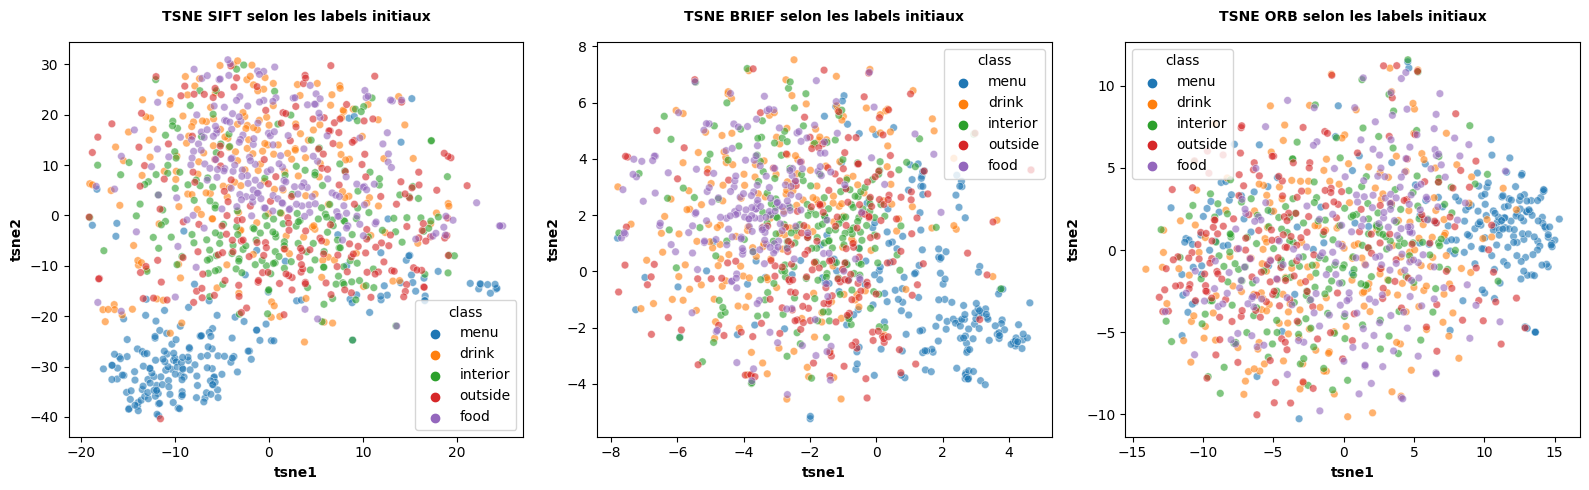

In [33]:
from sklearn import manifold, decomposition
import seaborn as sns

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
si_tsne = tsne.fit_transform(sift_pca)
br_tsne = tsne.fit_transform(brief_pca)
or_tsne = tsne.fit_transform(orb_pca)

df_si_tsne = pd.DataFrame(si_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_br_tsne = pd.DataFrame(br_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_or_tsne = pd.DataFrame(or_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#ne fonctionne que si le sindex sont alignés
df_si_tsne["class"] = photo_leg["label"]
df_br_tsne["class"] = photo_leg["label"]
df_or_tsne["class"] = photo_leg["label"]
print(df_si_tsne.shape)
print(df_br_tsne.shape)
print(df_or_tsne.shape)

#chart
plt.rcParams["figure.figsize"] = [16, 5]
#plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_si_tsne,
    legend="brief",
    ax=axes[0])

axes[0].set_title('TSNE SIFT selon les labels initiaux', fontsize = 10, pad = 15, fontweight = 'bold')
axes[0].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[0].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 12}) 

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_br_tsne,
    legend="brief",
    ax=axes[1])

axes[1].set_title('TSNE BRIEF selon les labels initiaux', fontsize = 10, pad = 15, fontweight = 'bold')
axes[1].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[1].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 12}) 

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_or_tsne,
    legend="brief",
    ax=axes[2])

axes[2].set_title('TSNE ORB selon les labels initiaux', fontsize = 10, pad = 15, fontweight = 'bold')
axes[2].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[2].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 12}) 

plt.show()

# analyse similarité entre clustering issues du SIFT sur 2D (post TSNE) et labels initiaux

(1000, 4)
ARI sift :  0.17115103228778072
ARI sift :  0.17115103228778072
(1000, 4)
ARI brief :  0.12888745608556365
ARI brief :  0.12888745608556365
(1000, 4)
ARI orb :  0.1078899383400435
ARI orb :  0.1078899383400435


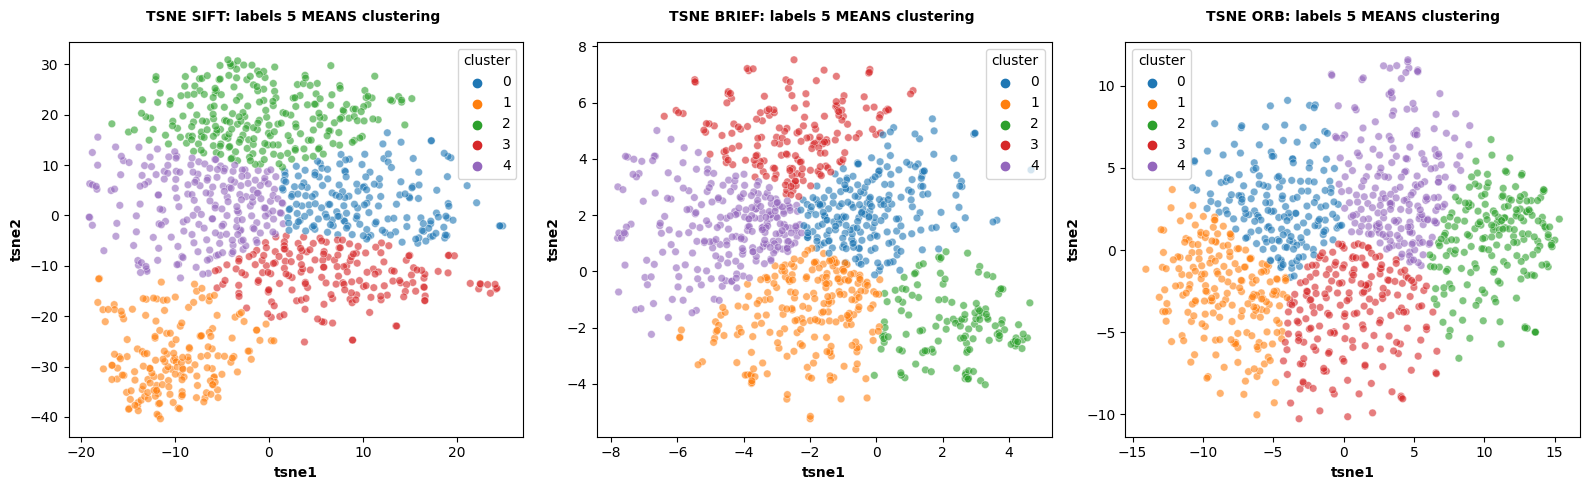

In [34]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=5, random_state=6)

#on fit sur le tableau si_tsne 2D provenant du tsne sur features post PCA
cls.fit(si_tsne)
#extraction des labels
df_si_tsne["cluster"] = cls.labels_
print(df_si_tsne.shape)

labels = photo_leg["label"]
print("ARI sift : ", metrics.adjusted_rand_score(labels, cls.labels_))
print("ARI sift : ", metrics.adjusted_rand_score(df_si_tsne['class'], df_si_tsne['cluster']))

#on fit sur le tableau br_tsne 2D provenant du tsne sur features post PCA
cls.fit(br_tsne)
#extraction des labels
df_br_tsne["cluster"] = cls.labels_
print(df_br_tsne.shape)

labels = photo_leg["label"]
print("ARI brief : ", metrics.adjusted_rand_score(labels, cls.labels_))
print("ARI brief : ", metrics.adjusted_rand_score(df_br_tsne['class'], df_br_tsne['cluster']))

#on fit sur le tableau or_tsne 2D provenant du tsne sur features post PCA
cls.fit(or_tsne)
#extraction des labels
df_or_tsne["cluster"] = cls.labels_
print(df_or_tsne.shape)

labels = photo_leg["label"]
print("ARI orb : ", metrics.adjusted_rand_score(labels, cls.labels_))
print("ARI orb : ", metrics.adjusted_rand_score(df_or_tsne['class'], df_or_tsne['cluster']))

###############################################################
#chart
plt.rcParams["figure.figsize"] = [16, 5]
#plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_si_tsne,
    legend="brief",
    ax=axes[0])

axes[0].set_title('TSNE SIFT: labels 5 MEANS clustering ', fontsize = 10, pad = 15, fontweight = 'bold')
axes[0].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[0].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_br_tsne,
    legend="brief",
    ax=axes[1])

axes[1].set_title('TSNE BRIEF: labels 5 MEANS clustering ', fontsize = 10, pad = 15, fontweight = 'bold')
axes[1].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[1].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_or_tsne,
    legend="brief",
    ax=axes[2])

axes[2].set_title('TSNE ORB: labels 5 MEANS clustering', fontsize = 10, pad = 15, fontweight = 'bold')
axes[2].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[2].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 

plt.show()


In [35]:
#codification des vraies categories
#on peut faire ca , mais le faire de facon aléatoire nous posera problème par la suite
    #df_si_tsne['class_code']=df_si_tsne['class'].astype('category').cat.codes
#on peut regarder le cluster le plus probable correspondant à la classe souhaitée mais on peut avoir le meme cluster correspondant à 2 classe differentes
    #display(df_si_tsne.groupby(['class'])['cluster'].value_counts(normalize=True))
    #display(pd.DataFrame(df_si_tsne.groupby(['cluster'])['class'].value_counts(normalize=True)))

#petit algo maison pour aligner lignes et colonnes de la matrice de confusion
#on fait le mapping entre label numerique des clusters et label le plus probable
def labelisation(df):
    h=pd.DataFrame(df.groupby(['cluster'])['class'].value_counts(normalize=True))
    h.columns=['pct']
    h=h.reset_index()
    h=h.sort_values(by=['pct'], ascending=False)
    #display(h)

    for i in range(5):
        h=h.reset_index(drop=True)
        if i==0:
            hh=h.iloc[0]
        else:
            hh=pd.concat([hh,h.iloc[0]],axis=1)
        class_temp=h['class'].iloc[0]
        clus_temp=h['cluster'].iloc[0]
        h=h.loc[((h['class']!=class_temp) & (h['cluster']!=clus_temp))]
    #display(hh.transpose())  
    return hh.transpose()

#transfo du mapping en dict 
class_si_dict = labelisation(df_si_tsne).set_index('class')['cluster'].to_dict()
class_br_dict = labelisation(df_br_tsne).set_index('class')['cluster'].to_dict()
class_or_dict = labelisation(df_or_tsne).set_index('class')['cluster'].to_dict()
#print(class_si_dict)
#print(class_br_dict)
#print(class_or_dict)

#mapping class->code 
df_si_tsne['class_code']=df_si_tsne['class'].map(class_si_dict)
df_br_tsne['class_code']=df_br_tsne['class'].map(class_br_dict)
df_or_tsne['class_code']=df_or_tsne['class'].map(class_or_dict)
#display(df_si_tsne)
#display(df_br_tsne)
#display(df_or_tsne)

sift
              precision    recall  f1-score   support

           0       0.32      0.28      0.30       200
           1       0.84      0.76      0.79       200
           2       0.36      0.45      0.40       200
           3       0.33      0.31      0.32       200
           4       0.31      0.33      0.32       200

    accuracy                           0.42      1000
   macro avg       0.43      0.42      0.43      1000
weighted avg       0.43      0.42      0.43      1000

brief
              precision    recall  f1-score   support

           0       0.33      0.36      0.34       200
           1       0.34      0.38      0.36       200
           2       0.86      0.56      0.68       200
           3       0.32      0.28      0.30       200
           4       0.45      0.56      0.50       200

    accuracy                           0.43      1000
   macro avg       0.46      0.43      0.44      1000
weighted avg       0.46      0.43      0.44      1000

orb
       

Text(0.5, 1.0, 'Matrix confusion ORB label/cluster')

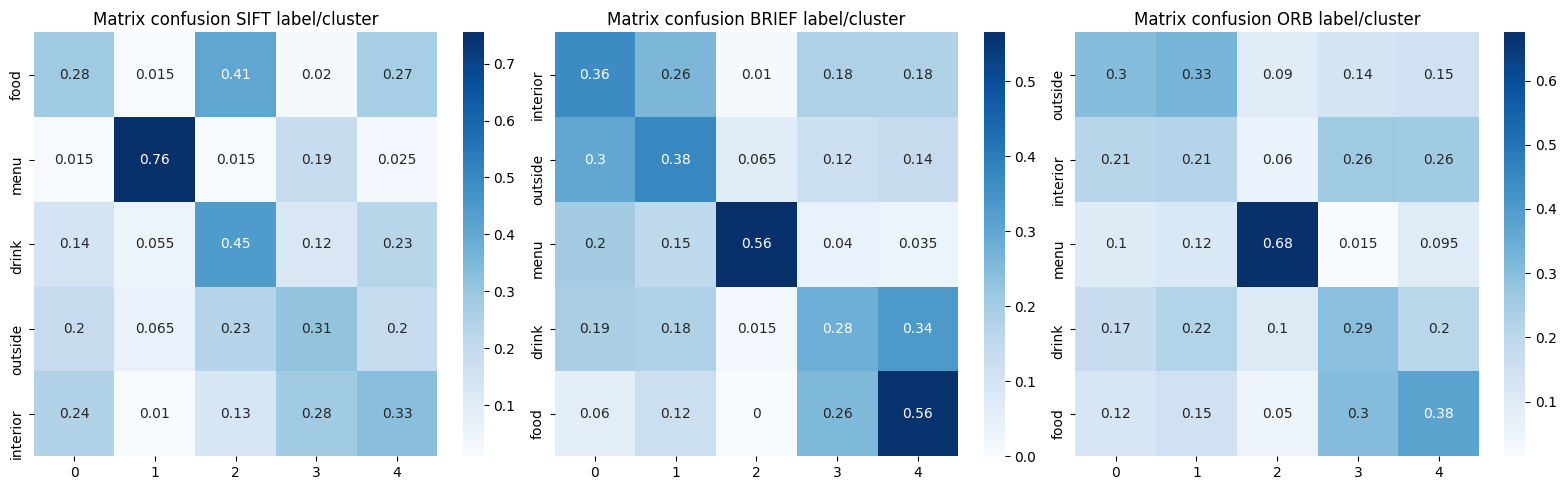

In [36]:
#important d'avoir le meme type pour la confusion matrix sinon erreur
#print(metrics.confusion_matrix(df_si_tsne['class_code'], df_si_tsne['cluster']))
#print(metrics.confusion_matrix(df_br_tsne['class_code'], df_br_tsne['cluster']))
#print(metrics.confusion_matrix(df_or_tsne['class_code'], df_or_tsne['cluster']))
# attention dans une matrice de confusion les indices de lignes et de colonnes doivent etre egaux d'ou le travail précedent
print("sift")
print(metrics.classification_report(df_si_tsne['class_code'], df_si_tsne['cluster']))
print("brief")
print(metrics.classification_report(df_br_tsne['class_code'], df_br_tsne['cluster']))
print("orb")
print(metrics.classification_report(df_or_tsne['class_code'], df_or_tsne['cluster']))
#########################################################################
df_si_cm = pd.DataFrame(metrics.confusion_matrix(df_si_tsne['class_code'], 
                                                 df_si_tsne['cluster'], normalize ='true'), 
                        index = labelisation(df_si_tsne).sort_values(by=['cluster'])['class'].tolist(),
                        columns = [i for i in "01234"])
df_br_cm = pd.DataFrame(metrics.confusion_matrix(df_br_tsne['class_code'], 
                                                 df_br_tsne['cluster'], normalize ='true'), 
                        index = labelisation(df_br_tsne).sort_values(by=['cluster'])['class'].tolist(),
                        columns = [i for i in "01234"])
df_or_cm = pd.DataFrame(metrics.confusion_matrix(df_or_tsne['class_code'], 
                                                 df_or_tsne['cluster'], normalize ='true'), 
                        index = labelisation(df_or_tsne).sort_values(by=['cluster'])['class'].tolist(),
                        columns = [i for i in "01234"])
#########################################################################
plt.rcParams["figure.figsize"] = [16, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
sns.heatmap(df_si_cm, annot=True, cmap="Blues",ax=axes[0])
axes[0].set_title('Matrix confusion SIFT label/cluster')
sns.heatmap(df_br_cm, annot=True, cmap="Blues",ax=axes[1])
axes[1].set_title('Matrix confusion BRIEF label/cluster')
sns.heatmap(df_or_cm, annot=True, cmap="Blues",ax=axes[2])
axes[2].set_title('Matrix confusion ORB label/cluster')

# NN - Transfer learning
* https://blog.paperspace.com/popular-deep-learning-architectures-resnet-inceptionv3-squeezenet/
   * NN model already trained on a similar problem 
   * decrease the training time
   * can result in lower generalization error
       * can be seen as a type of weight initilization scheme
        
   * challenge imagenet ILSVRC
       * many innovative models
            * useful learned features (1M images / 1000 cat)
            * state of teh art Perf
            * easily accessible
   * how to use pretrained model
       * classifier -> output
       * standalone feature extractor -> portion of the model
       * integrated (in a new model) feature extractor with frozen layers
       * weight initialization
   * transfer learning : 
       * STRAT 1 : total fine tuning 
           * last layer replaced by adapted classifier (svm/reg log)
           * init parameters of the previous layer from the pre trained model - speed gain
           * case: 
               * new LARGE image collection -> total retraining without overfitting risk
       * STRAT 2 : features extractor
           * last layer removed / frozen parameters
           * and classiffier training 
               * new SMALL image collection -> no retraining -> too small collection -> overfitting
       * STRAT 2 : MIX 1/2  partiel fine tuning
           * last layer replaced by adapted classifier (svm/reg log)
           * only the parameters of the low layers (modelisent les formes simples) are frozen
           * high layers (modelisent les formes complexes) are trained
               * new SMALL image collection but too different from the preentrained dataset
    * dozen or more dowladables top performing pre trained models for image recognition: 
        * VGG (vgg16/19)
        * GoogLeNet (inception v3)
        * residual network (ResNet)

# VGG16 (>138 millions de paramètres)
   * 16 couches:
       * 13 couches de convolution (les noyaus des filtres sont les poids de la couche) et quelques couches de pooling (reduction de taille qui rend moins precis la position des features en la lissant ce qui est un avantage pour la generalisation) 
           * filtres en couleurs de 3x3 px depalcés par 1 px
           * fonction d'activation ReLU (negatif->0) aprés chaque couche de convolution
           * 2 couches 224x224
               * puis 1 couche de pooling pour garder le meme nombre de feature en reduisant la taille de 2
           * 2 couches 112x112
               * puis 1 couche de pooling pour garder le meme nombre de feature en reduisant la taille de 2
           * 3 couches 56x56
               * puis 1 couche de pooling pour garder le meme nombre de feature en reduisant la taille de 2
           * 3 couches 28x28
               * puis 1 couche de pooling pour garder le meme nombre de feature en reduisant la taille de 2
           * 3 couches 14x14
               * puis 1 couche de pooling pour garder le meme nombre de feature en reduisant la taille de 2
               
       * 3 fully connected
           * 1 couche fully connected 7x7 -> vecter 4096 -> suivi par RELu
           * 1 couche fully connected 7x7 -> vecter 4096 -> suivi par RELu
           * la derniere sort la proba par class en uilisant la softmax (generalisation de la sigmoide à la multiclasses)
   * entree: images de 224x224 pixels 3 couleurs
   * output : 1000 classes

# comment implementer un VGG from SCRATCH avec KERAS

In [37]:
#module pour creation d'un reseau
from keras.models import Sequential
#modules pour ajout de couches respectivement convo, pooling, et fully connected
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 


#1er bloc 
# Ajout de la première couche de convolution, suivie d'une couche ReLU
# 64 filtres(neurones) 3x3 / dimenesion de l'entrée / padding /activation
my_VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))

# Ajout de la deuxième couche de convolution, suivie  d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Ajout de la première couche de pooling
# tailles des cellules de pooling : pool_size et pas de depalcement : strides
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#2ème bloc
my_VGG16.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#3ème bloc
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#4ème bloc
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#5ème bloc
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


# Conversion des matrices 3D en vecteur 1D
my_VGG16.add(Flatten()) 

# Ajout de la première couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))
# Ajout de la deuxième couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))
# Ajout de la dernière couche fully-connected qui permet de classifier
my_VGG16.add(Dense(1000, activation='softmax'))


#Compilation du modèle avec Sequential.compile()
#entrainement avec Sequential.fit()

# Utilisation du VGG16 pré entrainé sur quelques images

In [38]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, VGG16, decode_predictions
# Création du modèle VGG-16 implementé par Keras et preentrainé sur imagenet
model = VGG16() 

#le reseau doit recevoir en entrée une collection d'images

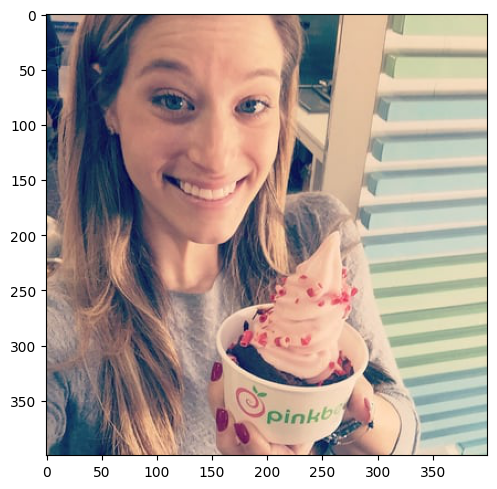

Top 3 : [('n07615774', 'ice_lolly', 0.16271389), ('n04357314', 'sunscreen', 0.12443831), ('n03476991', 'hair_spray', 0.11060534)]


In [39]:
img_name = 'input/photos/photos/' + photo_leg.loc[photo_leg.label=='drink','photo_id'][photo_leg.loc[photo_leg.label=='drink','photo_id'].index[0]]+'.jpg'
image = imread(img_name)
plt.imshow(image)
plt.show()
#chargement d'une image en 3 dimensions (width/height/3 color)
img = load_img(img_name, target_size=(224, 224))
# Convertir en tableau numpy
img = img_to_array(img) 
# reshape de 3D vers 4D en ajoutant la taille de la collection
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  
# Pretraitement des images similaires a celui du jeu pre entrainement
img = preprocess_input(img) 
# Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
y = model.predict(img)  
# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

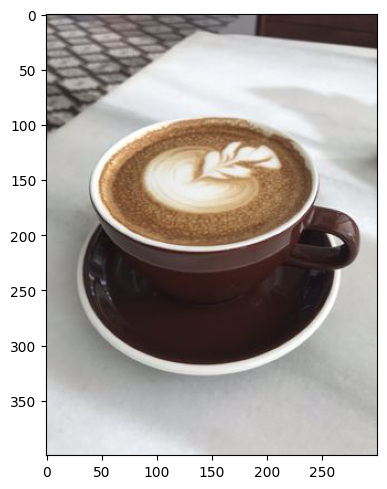

Top 3 : [('n07920052', 'espresso', 0.20633043), ('n04019541', 'puck', 0.15391573), ('n03259280', 'Dutch_oven', 0.10202522)]


In [40]:
img_name = 'input/photos/photos/' + photo_leg.loc[photo_leg.label=='drink','photo_id'][photo_leg.loc[photo_leg.label=='drink','photo_id'].index[1]]+'.jpg'
image = imread(img_name)
plt.imshow(image)
plt.show()
#chargement 
#chargement d'une image en 3 dimensions (width/height/3 color)
img = load_img(img_name, target_size=(224, 224))
# Convertir en tableau numpy
img = img_to_array(img) 
# reshape de 3D vers 4D en ajoutant la taille de la collection
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  
# Pretraitement des images similaires a celui du jeu pre entrainement
img = preprocess_input(img) 
# Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
y = model.predict(img)  
# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

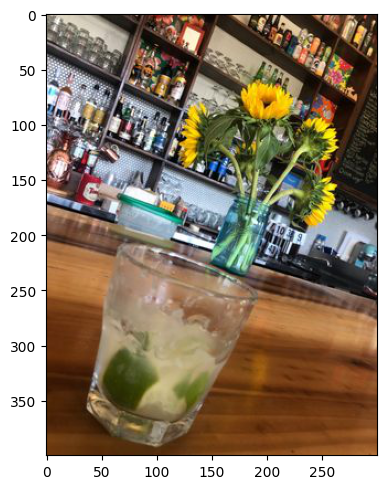

Top 3 : [('n03089624', 'confectionery', 0.16869654), ('n03461385', 'grocery_store', 0.13157132), ('n04462240', 'toyshop', 0.072720386)]


In [41]:
img_name = 'input/photos/photos/' + photo_leg.loc[photo_leg.label=='drink','photo_id'][photo_leg.loc[photo_leg.label=='drink','photo_id'].index[2]]+'.jpg'
image = imread(img_name)
plt.imshow(image)
plt.show()
#chargement 
#chargement d'une image en 3 dimensions (width/height/3 color)
img = load_img(img_name, target_size=(224, 224))
# Convertir en tableau numpy
img = img_to_array(img) 
# reshape de 3D vers 4D en ajoutant la taille de la collection
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  
# Pretraitement des images similaires a celui du jeu pre entrainement
img = preprocess_input(img) 
# Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
y = model.predict(img)  
# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

# Utilisation du VGG16 pré entrainé sur la collection d'images puis clustering

In [11]:
#https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## cas post convolution avec un pooling pour asser l'output de 4d à 2d

In [42]:
#modele VGG16 sans les couches fully connected , avec les poids imagenet, afin de recuperer les features post convolutions
#attention apres les filtres nous avons un array à plusieurs dimensions et non d'une matrice de n imaages et k features, il faudra donc reshaper la sortie pour obtenir une matrice

#model_vgg_notop = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)) #output (n images, 7, 7, 512)
    
#A model without a top will output activations from the last convolutional or pooling layer directly. 
#One approach to summarizing these activations for thier use in a classifier or as a feature vector representation of input is 
# to add a global pooling layer, such as a max global pooling or average global pooling. The result is a vector that can be used as a feature descriptor for an input. 
#Keras provides this capability directly via the ‘pooling‘ argument that can be set to ‘avg‘ or ‘max
#le pooling nous permet de passer de 4D à 2D et d'avoir une matrice de features utilisables avec n rows images et un nombre k de colonnes restreint
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3),pooling='max') #(n images, 512)

In [43]:
import numpy as np
#mise en place de al collection d'images sous forme de tableau np
for count,image_num in enumerate(range(photo_leg.shape[0])) :
    if image_num%100 == 0 : 
        print(image_num)
    filename = 'input/photos/photos/' + photo_leg['photo_id'][photo_leg['photo_id'].index[image_num]]+'.jpg'
    #chargement d'une image en 3 dimensions (width/height/3 color)
    img = load_img(filename, target_size=(224, 224))
    # Convertir en tableau numpy
    img = img_to_array(img) 
    # reshape de 3D vers 4D en ajoutant la taille de la collection
    if count==0:
        collection = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    else:
        collection = np.concatenate((collection,img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))),axis=0) 

0
100
200
300
400
500
600
700
800
900


In [44]:
#prediction de VGG16 : matrice de n images / 1000 colonnes de proba
# Pretraitement des images de la collection de facon similaire a celui du jeu pre entrainement

collection_pp = preprocess_input(collection) 

In [45]:
# prediction des features
#for reshape we need to provide (i rows, and j columns), -1 means unknow and try to do something according to initial shape

#im_features_vgg = model.predict(collection_pp).reshape(collection.shape[0],-1)
im_features_vgg = model.predict(collection_pp)
print(im_features_vgg.shape)

(1000, 512)


In [46]:
#PCA pour reduire les 1000 dimensions
from sklearn import manifold, decomposition

print("Dimensions dataset VGG avant réduction PCA : ", im_features_vgg.shape)
# pca avec 99% de variance gardée
pca = decomposition.PCA(n_components=0.99)
vgg_pca= pca.fit_transform(im_features_vgg)
print("Dimensions dataset VGG après réduction PCA : ", vgg_pca.shape, "reduction de: ", int(100*(vgg_pca.shape[1]-im_features_vgg.shape[1])/im_features_vgg.shape[1]),"%" )


Dimensions dataset VGG avant réduction PCA :  (1000, 512)
Dimensions dataset VGG après réduction PCA :  (1000, 422) reduction de:  -17 %


C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 3)
(1000, 4)
ARI vgg :  0.5916729267029166
ARI vgg :  0.5916729267029166


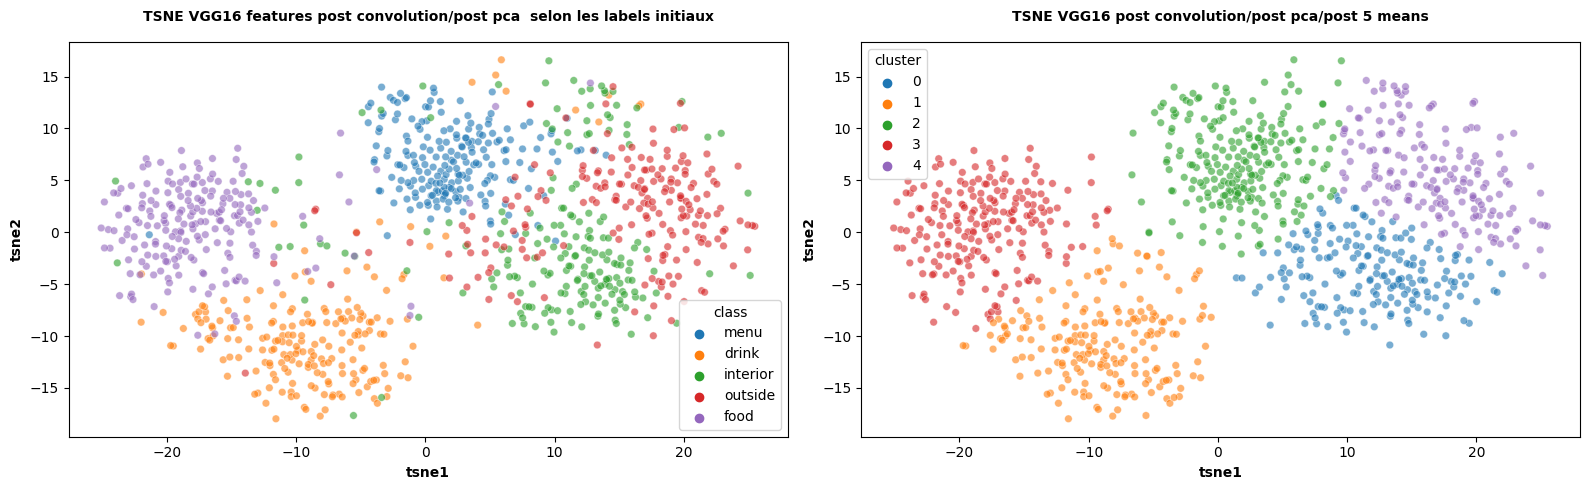

In [48]:
from sklearn import manifold, decomposition
import seaborn as sns

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
vgg_tsne = tsne.fit_transform(vgg_pca)


df_vgg_tsne = pd.DataFrame(vgg_tsne[:,0:2], columns=['tsne1', 'tsne2'])

#ne fonctionne que si le sindex sont alignés
df_vgg_tsne["class"] = photo_leg["label"]

print(df_vgg_tsne.shape)

################################################################################################################
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=5, random_state=6)

#on fit sur le tableau si_tsne 2D provenant du tsne sur features post PCA
cls.fit(vgg_tsne)
#extraction des labels
df_vgg_tsne["cluster"] = cls.labels_
print(df_vgg_tsne.shape)

labels = photo_leg["label"]
print("ARI vgg : ", metrics.adjusted_rand_score(labels, cls.labels_))
print("ARI vgg : ", metrics.adjusted_rand_score(df_vgg_tsne['class'], df_vgg_tsne['cluster']))

################################################################################################################
#chart
plt.rcParams["figure.figsize"] = [16, 5]
#plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_vgg_tsne,
    legend="brief",
    ax=axes[0])

axes[0].set_title('TSNE VGG16 features post convolution/post pca  selon les labels initiaux', fontsize = 10, pad = 15, fontweight = 'bold')
axes[0].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[0].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 


sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_vgg_tsne,
    legend="brief",
    ax=axes[1])

axes[1].set_title('TSNE VGG16 post convolution/post pca/post 5 means', fontsize = 10, pad = 15, fontweight = 'bold')
axes[1].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[1].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 

plt.show()

vgg
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       200
           1       0.88      0.86      0.87       200
           2       0.81      0.93      0.86       200
           3       0.87      0.91      0.89       200
           4       0.71      0.64      0.67       200

    accuracy                           0.80      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.79      0.80      0.79      1000



Text(0.5, 1.0, 'Matrix confusion VGG label/cluster')

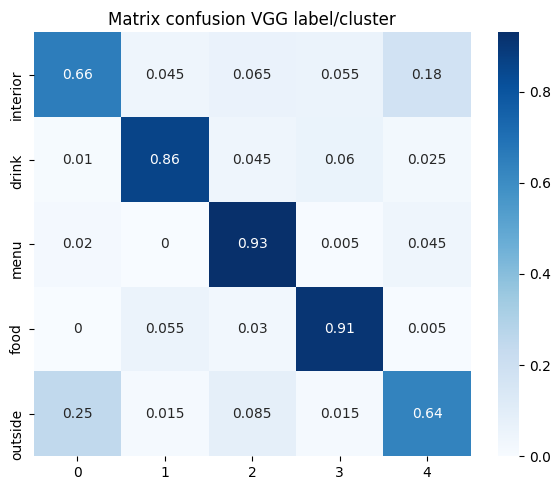

In [49]:
def labelisation(df):
    h=pd.DataFrame(df.groupby(['cluster'])['class'].value_counts(normalize=True))
    h.columns=['pct']
    h=h.reset_index()
    h=h.sort_values(by=['pct'], ascending=False)
    #display(h)

    for i in range(5):
        h=h.reset_index(drop=True)
        if i==0:
            hh=h.iloc[0]
        else:
            hh=pd.concat([hh,h.iloc[0]],axis=1)
        class_temp=h['class'].iloc[0]
        clus_temp=h['cluster'].iloc[0]
        h=h.loc[((h['class']!=class_temp) & (h['cluster']!=clus_temp))]
    #display(hh.transpose())  
    return hh.transpose()

#transfo du mapping en dict 
class_vgg_dict = labelisation(df_vgg_tsne).set_index('class')['cluster'].to_dict()
#print(class_vgg_dict)

#mapping class->code 
df_vgg_tsne['class_code']=df_vgg_tsne['class'].map(class_vgg_dict)
#display(df_vgg_tsne)

#important d'avoir le meme type pour la confusion matrix sinon erreur
#print(metrics.confusion_matrix(df_vgg_tsne['class_code'], df_vgg_tsne['cluster']))
# attention dans une matrice de confusion les indices de lignes et de colonnes doivent etre egaux d'ou le travail précedent
print("vgg")
print(metrics.classification_report(df_vgg_tsne['class_code'], df_vgg_tsne['cluster']))

#########################################################################
df_vgg_cm = pd.DataFrame(metrics.confusion_matrix(df_vgg_tsne['class_code'], 
                                                 df_vgg_tsne['cluster'], normalize ='true'), 
                        index = labelisation(df_vgg_tsne).sort_values(by=['cluster'])['class'].tolist(),
                        columns = [i for i in "01234"])

#########################################################################
plt.rcParams["figure.figsize"] = [6, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 1)
sns.heatmap(df_vgg_cm, annot=True, cmap="Blues",ax=axes)
axes.set_title('Matrix confusion VGG label/cluster')


## cas sortie aprés la première couche dense (4096 colonnes)

In [50]:
from keras import Model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

im_features_vgg = model.predict(collection_pp)
print(im_features_vgg.shape)

(1000, 4096)


In [51]:
#PCA pour reduire les 1000 dimensions
from sklearn import manifold, decomposition

print("Dimensions dataset VGG avant réduction PCA : ", im_features_vgg.shape)
# pca avec 99% de variance gardée
pca = decomposition.PCA(n_components=0.99)
vgg_pca= pca.fit_transform(im_features_vgg)
print("Dimensions dataset VGG après réduction PCA : ", vgg_pca.shape, "reduction de: ", int(100*(vgg_pca.shape[1]-im_features_vgg.shape[1])/im_features_vgg.shape[1]),"%" )

Dimensions dataset VGG avant réduction PCA :  (1000, 4096)
Dimensions dataset VGG après réduction PCA :  (1000, 830) reduction de:  -79 %


C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 3)
(1000, 4)
ARI vgg :  0.7306777236011395
ARI vgg :  0.7306777236011395


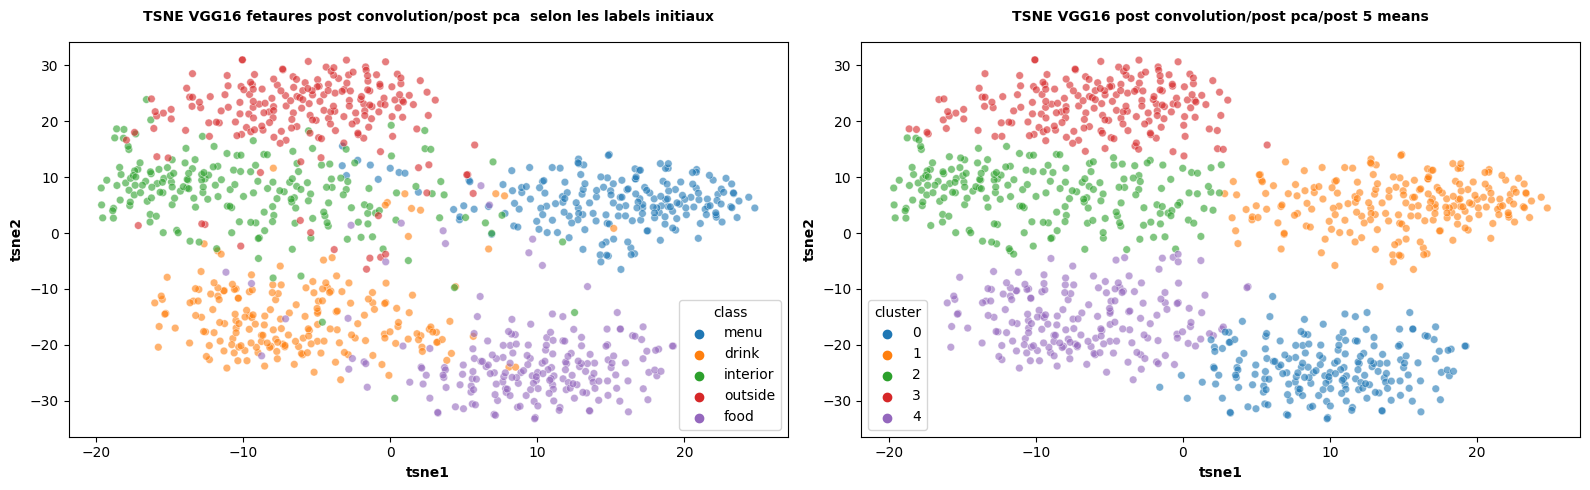

In [52]:
from sklearn import manifold, decomposition
import seaborn as sns

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
vgg_tsne = tsne.fit_transform(vgg_pca)


df_vgg_tsne = pd.DataFrame(vgg_tsne[:,0:2], columns=['tsne1', 'tsne2'])

#ne fonctionne que si le sindex sont alignés
df_vgg_tsne["class"] = photo_leg["label"]

print(df_vgg_tsne.shape)

################################################################################################################
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=5, random_state=6)

#on fit sur le tableau si_tsne 2D provenant du tsne sur features post PCA
cls.fit(vgg_tsne)
#extraction des labels
df_vgg_tsne["cluster"] = cls.labels_
print(df_vgg_tsne.shape)

labels = photo_leg["label"]
print("ARI vgg : ", metrics.adjusted_rand_score(labels, cls.labels_))
print("ARI vgg : ", metrics.adjusted_rand_score(df_vgg_tsne['class'], df_vgg_tsne['cluster']))

################################################################################################################
#chart
plt.rcParams["figure.figsize"] = [16, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_vgg_tsne,
    legend="brief",
    ax=axes[0])

axes[0].set_title('TSNE VGG16 fetaures post convolution/post pca  selon les labels initiaux', fontsize = 10, pad = 15, fontweight = 'bold')
axes[0].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[0].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 


sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=5), s=30, alpha=0.6,
    data=df_vgg_tsne,
    legend="brief",
    ax=axes[1])

axes[1].set_title('TSNE VGG16 post convolution/post pca/post 5 means', fontsize = 10, pad = 15, fontweight = 'bold')
axes[1].set_xlabel('tsne1', fontsize = 10, fontweight = 'bold')
axes[1].set_ylabel('tsne2', fontsize = 10, fontweight = 'bold')
#plt.legend(prop={'size': 14}) 

plt.show()

vgg
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       200
           1       0.88      0.95      0.92       200
           2       0.81      0.83      0.82       200
           3       0.91      0.88      0.90       200
           4       0.89      0.85      0.87       200

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



Text(0.5, 1.0, 'Matrix confusion VGG label/cluster')

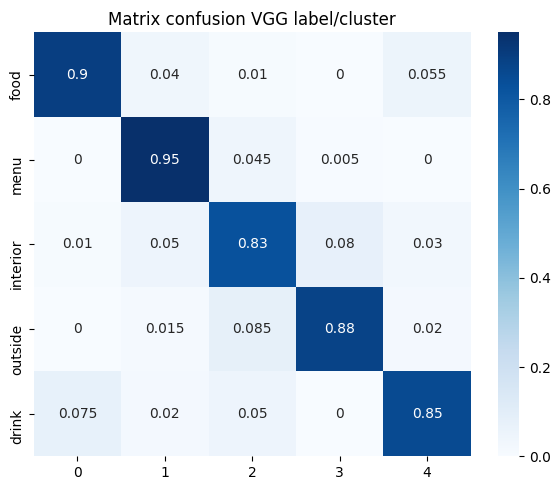

In [53]:
#transfo du mapping en dict 
class_vgg_dict = labelisation(df_vgg_tsne).set_index('class')['cluster'].to_dict()
#print(class_vgg_dict)

#mapping class->code 
df_vgg_tsne['class_code']=df_vgg_tsne['class'].map(class_vgg_dict)
#display(df_vgg_tsne)

#important d'avoir le meme type pour la confusion matrix sinon erreur
#print(metrics.confusion_matrix(df_vgg_tsne['class_code'], df_vgg_tsne['cluster']))
# attention dans une matrice de confusion les indices de lignes et de colonnes doivent etre egaux d'ou le travail précedent
print("vgg")
print(metrics.classification_report(df_vgg_tsne['class_code'], df_vgg_tsne['cluster']))

#########################################################################
df_vgg_cm = pd.DataFrame(metrics.confusion_matrix(df_vgg_tsne['class_code'], 
                                                 df_vgg_tsne['cluster'], normalize ='true'), 
                        index = labelisation(df_vgg_tsne).sort_values(by=['cluster'])['class'].tolist(),
                        columns = [i for i in "01234"])

#########################################################################
plt.rcParams["figure.figsize"] = [6, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 1)
sns.heatmap(df_vgg_cm, annot=True, cmap="Blues",ax=axes)
axes.set_title('Matrix confusion VGG label/cluster')

# TRANSFER LEARNING avec VGG16

## creation du modèle (convo=vgg16 non entrainable, classifieur perso entrainable)

In [54]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras import Model
# Charger VGG-16 pré-entraîné 
    #sur ImageNet weights="imagenet"
    #sans les couches fully-connected : include_top=False
    #on reprecise l'input shape (à voir si necessaire)
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

#strategie 2 de Transfer Learning: on ne reentraine que le nouveau classifieur , les poids des couches de convolutions de bougent pas => strategie de feature extraction
for layer in model.layers:
    layer.trainable = False

# add new classifier layers
flat1 = Flatten()(model.layers[-1].output) #On peut egalement remplacer par uen couche de pooling, pour passer la sortie (n images, 14, 14, 512) en 2D (n images, 100352 ou 25088
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(5, activation='softmax')(class1)

# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## compilation

In [55]:
# Compiler le modèle 
model.compile(loss="CategoricalCrossentropy", optimizer='adam', metrics=["accuracy"])

## creation de la collection d'images train : on peut certainement rationaliser cette etape 

In [56]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, VGG16, decode_predictions
import numpy as np
#mise en place de al collection d'images d'entrainement sous forme de tableau np
for count,image_num in enumerate(range(photo_des_train.shape[0])) :
    if image_num%100 == 0 : 
        print(image_num)
    filename = 'input/photos/photos/' + photo_des_train['photo_id'][photo_des_train['photo_id'].index[image_num]]+'.jpg'
    #chargement d'une image en 3 dimensions (width/height/3 color)
    #load_img creates a PIL image (completely equivalent to PIL.Image.open()
    #You can close them to avoid a slowdown:
    with load_img(filename, target_size=(224, 224)) as img:
        # Convertir en tableau numpy
        img = img_to_array(img) 
        # reshape de 3D vers 4D en ajoutant la taille de la collection
        if count==0:
            collection_train = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        else:
            collection_train = np.concatenate((collection_train,img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))),axis=0) 

0
100
200
300
400
500
600
700
800
900


## on formatte le y train (matrice de 5 colonnes car 5 classes -> facon hot encoder)

In [57]:
#digitalisation du y_train
from tensorflow.keras.utils import to_categorical

photo_des_train['label']=photo_des_train['label'].astype('category')
dict_train_label=dict( enumerate(photo_des_train['label'].cat.categories ) )
y_train=photo_des_train['label'].cat.codes

encoded = to_categorical(y_train)
print(encoded)
print(encoded.shape)

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(1000, 5)


## preprocess facon vgg16 de la collection train

In [58]:
#pretraitement similaires aux photos du preentrainement
collection_train_p = preprocess_input(collection_train) 

## entrainement

In [59]:
# Entraîner sur les données d'entraînement (X_train, y_train)

model_info = model.fit(collection_train_p, encoded,batch_size=32,validation_split=0.2, epochs=50, verbose=2)

Epoch 1/50
25/25 - 2s - loss: 26.5893 - accuracy: 0.7763 - val_loss: 4.6122 - val_accuracy: 0.9050 - 2s/epoch - 92ms/step
Epoch 2/50
25/25 - 2s - loss: 1.8717 - accuracy: 0.9438 - val_loss: 4.0044 - val_accuracy: 0.9150 - 2s/epoch - 64ms/step
Epoch 3/50
25/25 - 2s - loss: 0.2918 - accuracy: 0.9837 - val_loss: 3.6568 - val_accuracy: 0.9150 - 2s/epoch - 64ms/step
Epoch 4/50
25/25 - 2s - loss: 0.1262 - accuracy: 0.9937 - val_loss: 4.1815 - val_accuracy: 0.9250 - 2s/epoch - 64ms/step
Epoch 5/50
25/25 - 2s - loss: 0.0070 - accuracy: 0.9987 - val_loss: 5.2806 - val_accuracy: 0.9050 - 2s/epoch - 64ms/step
Epoch 6/50
25/25 - 2s - loss: 0.0598 - accuracy: 0.9975 - val_loss: 4.2583 - val_accuracy: 0.9250 - 2s/epoch - 64ms/step
Epoch 7/50
25/25 - 2s - loss: 0.1275 - accuracy: 0.9962 - val_loss: 5.3623 - val_accuracy: 0.9150 - 2s/epoch - 64ms/step
Epoch 8/50
25/25 - 2s - loss: 0.3881 - accuracy: 0.9912 - val_loss: 4.5908 - val_accuracy: 0.9300 - 2s/epoch - 64ms/step
Epoch 9/50
25/25 - 2s - loss: 0

In [31]:
print(model_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


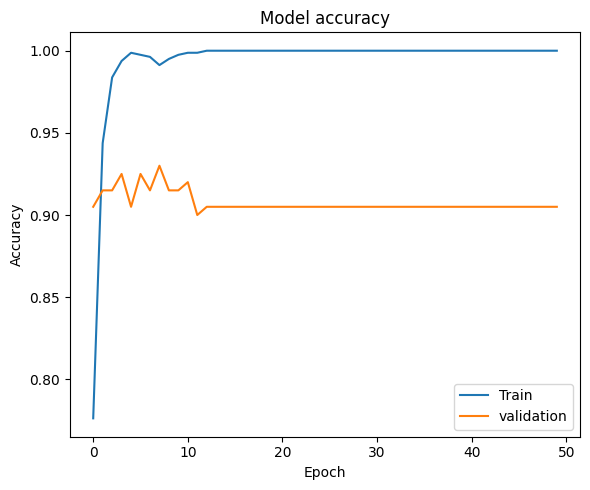

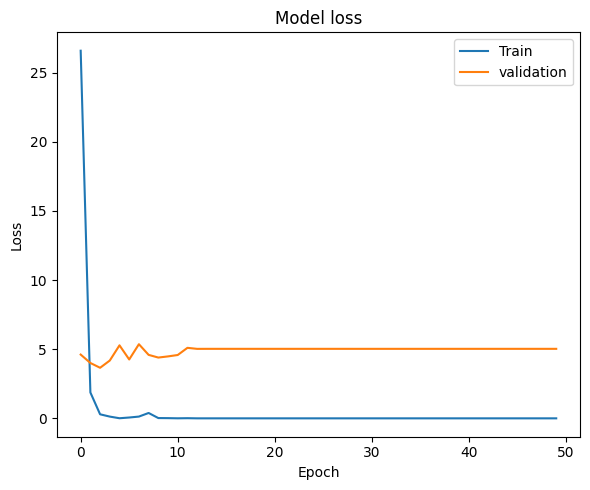

In [65]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc='lower right')
plt.show()

plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc='upper right')
plt.show()

In [67]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## prediction d'un echantillon test

In [61]:
import numpy as np
#mise en place de al collection d'images sous forme de tableau np
for count,image_num in enumerate(range(photo_leg.shape[0])) :
    if image_num%100 == 0 : 
        print(image_num)
    filename = 'input/photos/photos/' + photo_leg['photo_id'][photo_leg['photo_id'].index[image_num]]+'.jpg'
    #chargement d'une image en 3 dimensions (width/height/3 color)
    img = load_img(filename, target_size=(224, 224))
    # Convertir en tableau numpy
    img = img_to_array(img) 
    # reshape de 3D vers 4D en ajoutant la taille de la collection
    if count==0:
        collection = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    else:
        collection = np.concatenate((collection,img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))),axis=0) 

0
100
200
300
400
500
600
700
800
900


In [62]:
collection_test_pp = preprocess_input(collection) 

In [63]:
im_test_vgg = model.predict(collection_test_pp)
print(im_test_vgg.shape)

(1000, 5)


In [64]:
from sklearn import cluster, metrics
labels = photo_leg["label"]
print("ARI vgg : ", metrics.adjusted_rand_score(labels, im_test_vgg.argmax(axis=1)))

ARI vgg :  0.7902178872064538
